# 10.5 Final Analysis

#### Import libraries and dataframe - input 1
#### Create function categorizing price ranges - input 6
#### Create new column of price-range category - input 7
#### Visualization of price-range - input 13
#### Ideas for other potential profiling - below input 15
#### Export of new dataframe - input 14

Import Libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
path = r'C:\Users\Neena Tilton\Dropbox\Projects\01_2020_InstacartBasket'

In [5]:
df_main_dept = pd.read_pickle(os.path.join(path, '02_Data', 'PreparedData', 'df_main_dept.pkl'))

Creating price-range flag: user-def function using if-stmt

Making a user-defined function 'price_label(row)':

In [6]:
def price_label(row):
    
    if row['prices'] <= 5:
        return 'low-range product'
    elif (row['prices'] > 5) & (row['prices'] <= 15):
        return 'mid-range product'
    elif row['prices'] > 15:
        return 'high-range product'
    else:
        return 'not enough data'

Applying price range label using new function:

In [7]:
df_main_dept['price_range_flag'] = df_main_dept.apply(price_label, axis = 1)

In [8]:
df_main_dept.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 39 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_time_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  busiest_day                    category
 14  Busiest_days                   category
 15  busiest_period_of_day          category
 16  max_order                      int64   
 17  loyalty_flag             

In [9]:
# Update data type of new column from string to category
df_main_dept['price_range_flag'] = df_main_dept['price_range_flag'].astype('category')

In [10]:
df_main_dept.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 39 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_time_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  busiest_day                    category
 14  Busiest_days                   category
 15  busiest_period_of_day          category
 16  max_order                      int64   
 17  loyalty_flag             

Visualization of price-range of all products

Text(0, 0.5, ' ')

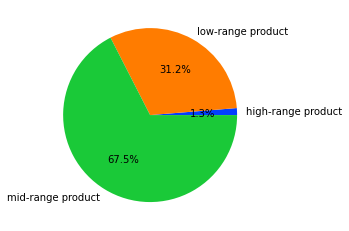

In [13]:
pie_price_range = df_main_dept['price_range_flag'].value_counts().sort_index().plot.pie(autopct = '%1.1f%%', colors = sns.color_palette('bright', 3))

plt.ylabel(' ')

In [15]:
# Export viz
pie_price_range.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'pie_price_range.png'))

Exporting new dataframe:

In [14]:
df_main_dept.to_pickle(os.path.join(path, '02_Data', 'PreparedData', 'df_final.pkl'))